# Sentiment Analysis

### 1) Classifier per Category

In [7]:
## Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

## Librerias para graficación
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK es una librería particular para PLN. Tiene muchas funcionalidades entre ellas stemming y lista de palabras de parada.
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd
import os
# Logistic regression
from sklearn.linear_model import LogisticRegression, SGDClassifier

stemmer = nltk.stem.SnowballStemmer('english') # Vamos a utlizar el Snowball Stemmer para realizar stemming (nos permite llevar las palabras a una forma estandar).
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#Preprocessing of words
def processing_text(texto):
    processed_feature = re.sub(r'\W', ' ', str(texto))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)

    return processed_feature

In [9]:
# Define function to read and preprocess the reviews
def read_and_preprocess_reviews(folder_path):
    
    dictionary = {}
    merged_categories_reviews = []
    merged_categories_labels = []
    
    #Define stopwords
    stopwords_english = set(stopwords.words('english'))

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category) #Category path
        if os.path.isdir(category_path):
            for sentiment in ["positive","negative","unlabeled"]:
                sentiment_path = os.path.join(category_path, sentiment + '.review') #Sentiment path
                if os.path.isfile(sentiment_path):
                    with open(sentiment_path, 'r',encoding='utf-8') as file:
                        review_text = file.read()
                        # Preprocess input data
                        preprocess = processing_text(review_text)
                        words = nltk.word_tokenize(preprocess)
                        string = ""
                        train_reviews = []
                        train_labels = []
                        
                        for word in words:
                            if word == "positive" or word == "negative":
                                train_labels.append(word)
                                train_reviews.append(string)
                                #For the overrall reviews without category discrimination
                                merged_categories_reviews.append(string)
                                merged_categories_labels.append(word)
                                string = ""
                            else:
                                string += word + " "
                        
        # list of reviews per category with their respective class(posituive or negative)     
        dictionary[category] = (train_reviews,train_labels)



    return dictionary,(merged_categories_reviews,merged_categories_labels)
                

data_folder = './Multi Domain Sentiment/processed_acl'
reviews_training_set = read_and_preprocess_reviews(data_folder)
merged_reviews = read_and_preprocess_reviews(data_folder)[1]

## Naive Bayes

In [12]:
#Bag of words
vectorizer = CountVectorizer(max_features=2500, stop_words=stopwords.words('english'))
#TfIdf 
vectorizer_tfIdf = TfidfVectorizer()
# Dividir training,validation y test y aplicar naive bayes. Devuelve el accuracy del modelo
for categories in reviews_training_set:
    # Usar el Tf vectorizer
    reviews = reviews_training_set[categories][0] #Reviews
    labels = reviews_training_set[categories][1] #Labels of the review respectively
    texto_features = vectorizer.fit_transform(reviews).toarray()
    # Dividir los datos en training(70%), validation (15%), and test (15%).
    x_train, x_temp, y_train, y_temp = train_test_split(texto_features, labels, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)
    #Entrenar el modelo naive bayes
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    val_predictions_tf = nb.predict(x_val) # Evaluate on the validation set
    #Evaluar que tan bueno es el modelo
    test_predictions_tf = nb.predict(x_test)
    # Ahora calculamos el score de accuracy enviando las predicciónes y los valores reales de polaridad.
    print(f"{accuracy_score(y_test, test_predictions_tf)} tf representation")

    # Dividir los datos en training(70%), validation (15%), and test (15%).
    x_train_tfidf, x_temp_tfidf, y_train_tfidf, y_temp_tfidf = train_test_split(reviews, labels, test_size=0.3, random_state=0)
    x_val_tfidf, x_test_tfidf, y_val_tfidf, y_test_tfidf = train_test_split(x_temp_tfidf, y_temp_tfidf, test_size=0.5, random_state=0)
    #Tf-idf representation
    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(x_train_tfidf)
    X_val_tfidf = tfidf_vectorizer.transform(x_val_tfidf)
    X_test_tfidf = tfidf_vectorizer.transform(x_test_tfidf)
    #Naive Bayes
    clf = MultinomialNB()
    #Train the model
    clf.fit(X_train_tfidf, y_train)
    val_predictions = clf.predict(X_val_tfidf)
    #Evaluar el modelo
    test_predictions = clf.predict(X_test_tfidf)
    # Ahora calculamos el score de accuracy enviando las predicciónes y los valores reales de polaridad.
    print(f"{accuracy_score(y_test_tfidf, test_predictions)} tfidf representation")

    

0.8172661870503597 tf representation
0.8633093525179856 tfidf representation
0.7989130434782609 tf representation
0.8369565217391305 tfidf representation
0.8577981651376146 tf representation
0.8727064220183486 tfidf representation
0.8601321585903083 tf representation
0.8953744493392071 tfidf representation


### Prueba con una frase Naive Bayes

In [ ]:
test = "Its the best movie ive seen in terms of quality but I loved the overrall of the movie. Recommend it!"

procesamiento = processing_text(test)

test_bow =vectorizer.transform([procesamiento]) # Ahora lo representamos como una bolsa de palabras. El vector resultante tiene 2500 posiciones.
print("PASO 2 representación:" ,test_bow)

clase_test = nb.predict(test_bow)
print("PASO 3 predecir con el modelo:" ,clase_test)

### Confussion Matrix

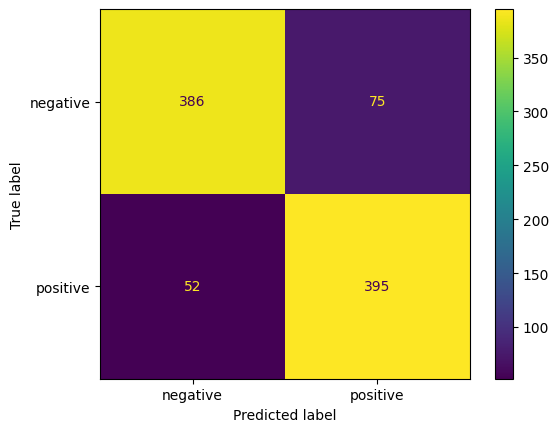

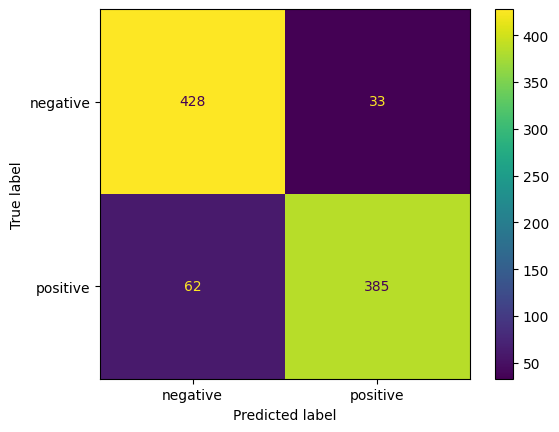

In [13]:
#Tf representation
cm = confusion_matrix(y_test, test_predictions_tf,labels=nb.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
matrix.plot()
#TfIdf representation
cm = confusion_matrix(y_test_tfidf, test_predictions,labels=nb.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
matrix.plot()

#### Evaluation metrics precision, recall, F1, and accuracy

In [16]:
#Tf representation
print(classification_report(y_test, test_predictions_tf, digits=4))
print("-"*100)
#TfIdf representation
print(classification_report(y_test_tfidf, test_predictions, digits=4))

              precision    recall  f1-score   support

    negative     0.8813    0.8373    0.8587       461
    positive     0.8404    0.8837    0.8615       447

    accuracy                         0.8601       908
   macro avg     0.8609    0.8605    0.8601       908
weighted avg     0.8612    0.8601    0.8601       908

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    negative     0.8735    0.9284    0.9001       461
    positive     0.9211    0.8613    0.8902       447

    accuracy                         0.8954       908
   macro avg     0.8973    0.8949    0.8951       908
weighted avg     0.8969    0.8954    0.8952       908



## Logistic Regression